# MeDiANN AI 

This is the official notebook for MeDiANN AI, the Machine Learning model that emulates the behavior of the S4 method to generate the Reflections and Transmission coefficients for different kinds of geometrical parameters and for different wavelengths. 

## 0. Import modules

The first thing that we need to do is to import the libraries.

In [58]:
import numpy as np 
import matplotlib.pyplot as plt 
from constants import * 
from data_importer import DataImporter
from MeDiANN import MeDiANN_Magic
from util import * 
from result_analyzer import ResultAnalyzer
import warnings
warnings.filterwarnings("ignore")


## 1. Data Importer 

The first object that we need to select is the Data Importer one. Assuming that you generated data somewhere, you can set the data folder path, or the root folder path that has a `\data` folder in it. If you don't, we will assume that the root path is in the same folder where you are running this notebook. 

In [59]:
root_path= '/home/apexmds/Documents/GitHub/MeDiANN2.0' #change this path here as the root path
data_path = root_path+'/data' #or directly change this into the data path
model_path = root_path+'/model' #model directory, where you will store the models once that they are trained

After we select the data path or root path, you can select the name of the parameter list name, reflection list name and transmission list name:
* The parameter list name is the name of the geometrical parameters. It is assumed to be `X.npy`
* The reflection list name is the name of the reflection. It is assumed to be `reflection.npy`
* The transmission list name is the name of the transmission. It is assumed to be `transmission.npy` 

In [60]:
parameter_file_name = 'X_10_p_a.npy' #Name of the parameter name 
reflection_file_name = 'reflection_10_p_a.npy' # Name of the reflection file name  
transmission_file_name = 'transmission_10_p_a.npy' #Name of the transmission file name

Another thing you can select is the name of the experiment name. Everything that you will store out of the experiment will be saved with the experiment name:

In [61]:
experiment_name = 'magic_model' #Store the name of the experiment however you like

Once that you have selected all of it, let's set the `DataImporter`:

In [62]:
data_importer = DataImporter(root_path=root_path,data_path=None,experiment_name=experiment_name,
                                X_path_name=parameter_file_name,T_path_name=transmission_file_name,
                                R_path_name=reflection_file_name)

The `data_importer` has a function that is named `import_data`. You can use this to import the data:

In [63]:
data = data_importer.import_data()


Welcome to MeDiANN! Your data is being imported.

The type of your data is selected as npy
Filtering is successfull! 

The dimension of the parameter array is  (11884, 6)
The dimension of the reflection array is  (11884, 101)
The dimension of the transmission array is  (11884, 101)
Transformation of X is successfull! 

Training, validation, test split is successfull! 



The dataset is a `dictionary`. The keys of this data dictionary are the following:

## 2. MeDiANN Magic (Machine Learning Model)

The Machine Learning model is run **after** the data importer part. What you need to run this is the 
* `output_path` that is the path where you want to store the output 
* `result_path` that is the path where you want to store the results
*  `model_path` that is the path where you want to store the trained models
* `target` that is the target ( R or T )


In [64]:
pre_trained_model_path = root_path+'/model/' #Insert model path 
output_path = root_path +'/output/' #Insert output 
result_path = root_path + '/result/' #Result path 
target = 'R' #The target of the model, it can be R or T

Once that these inputs are stored, we call the MeDiANN_MAgic object, and it is the main object of the Machine Learning.

In [65]:
mediann = MeDiANN_Magic(data,target,pre_trained_model_path=None,experiment_name=experiment_name,
                        output_path=None,activation_function = ACTIVATION_FUNCTION,
                        output_type = OUTPUT_FILE_TYPE,root_path = root_path)

The training part of these models go through the `train_baseline_model` and `train_boost_model`:

In [66]:
baseline_model = mediann.train_baseline_model()
boosted_model = mediann.train_boost_model(baseline_model)

The model has been defined 

Training of the baseline machine learning model has started 

Epoch 1/300
48/48 [==============================] - 2s 38ms/step - loss: 0.2104 - val_loss: 0.1535 - lr: 0.0010
Epoch 2/300
48/48 [==============================] - 2s 43ms/step - loss: 0.1307 - val_loss: 0.1377 - lr: 0.0010
Epoch 3/300
48/48 [==============================] - 2s 42ms/step - loss: 0.1213 - val_loss: 0.1313 - lr: 0.0010
Epoch 4/300
48/48 [==============================] - 2s 34ms/step - loss: 0.1192 - val_loss: 0.1345 - lr: 0.0010
Epoch 5/300
48/48 [==============================] - 2s 44ms/step - loss: 0.1150 - val_loss: 0.1257 - lr: 0.0010
Epoch 6/300
48/48 [==============================] - 2s 44ms/step - loss: 0.1114 - val_loss: 0.1237 - lr: 0.0010
Epoch 7/300
48/48 [==============================] - 2s 34ms/step - loss: 0.1083 - val_loss: 0.1385 - lr: 0.0010
Epoch 8/300
48/48 [==============================] - 2s 43ms/step - loss: 0.1076 - val_loss: 0.1160 - lr: 0.0010
Epoch

These two models are trained, we can run the predictions:

In [67]:
baseline_pred = mediann.predict(model=baseline_model)
boosted_pred = mediann.predict_boost(model_pred=baseline_pred, model_boost=boosted_model)

The model results will be saved as a .npy file with name /baseline_method_magic_model_pred
372/372 [==============================] - 1s 3ms/step
The boost model results will be saved as a .npy file with name /boost_method_magic_model_pred
372/372 [==============================] - 1s 3ms/step


## 3. Result Analyzer
After the MeDiANN model has been run and the models have been run and trained, we can analyze the results:

We need to input:

* The `data` dictionary (generated before)
* The `baseline` and `boosted models` trained before
* The `target` (selected before)
* The `name of the experiment` (you can leave it as before or change it)
* The `heatmap_path` if you have one (optional)


In [71]:
import tensorflow as tf
selected_model = tf.keras.models.load_model(model_path+'/baseline_model_R_magic_model.hdf5')
boosted_model = tf.keras.models.load_model(model_path+'/baseline_model_R_magic_model.hdf5')

In [72]:

target ='R'
experiment_name = 'case_51_wavelength_501'
heatmap_path = '/home/apexmds/Desktop/pcm_phc_tr/MeDiANN_AI2.0/data/heatmap_numbasis_51_num_wlngth_501/heatmap_0.5.csv'
result_analyzer = ResultAnalyzer(data=data,model=selected_model,model_name='test_20_p',
                                    target=target,boost_model=boosted_model,result_path=result_path, root_path=root_path,
                                    heatmap_path=heatmap_path,experiment_name=experiment_name)

372/372 [==============================] - 1s 3ms/step


You can select the method and validate it (extract the error) using the baseline or boost:

In [78]:
baseline_error = result_analyzer.validate_method(method='baseline')
boost_error = result_analyzer.validate_method(method='boost')

We can then compare then using the comparison_result:

In [100]:
comparison_result = result_analyzer.compare_methods(baseline_error,boost_error)

comparison_result


,"case_51_wavelength_501, baseline error","case_51_wavelength_501, boosted model error"
count,119.000000,119.000000
mean,0.035443,0.448568
std,0.025972,0.029861
min,0.004912,0.387010
25%,0.015495,0.424552
50%,0.029153,0.446011
75%,0.048762,0.476294
max,0.128882,0.505210


In [102]:
result_analyzer.heatmap_plotter(method='boost')
result_analyzer.heatmap_plotter(method='baseline')

FileNotFoundError: [Errno 2] No such file or directory: '/home/apexmds/Desktop/pcm_phc_tr/MeDiANN_AI2.0/data/heatmap_numbasis_51_num_wlngth_501/heatmap_0.5.csv'

In [103]:
R_real = data['R'][:,0:501]

In [104]:
R_pred_baseline = np.array(baseline_pred)[:,0:501]
R_pred_boost = np.array(boosted_pred)[:,0:501]

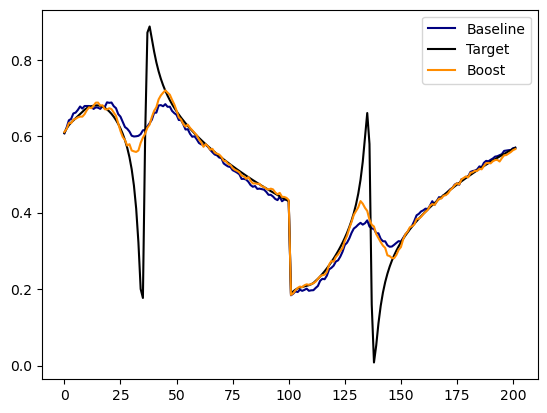

In [105]:
K = np.random.choice(len(data['X']))
plt.plot(R_pred_baseline[K],color='navy',label='Baseline')
plt.plot(R_real[K],color='k',label='Target')
plt.plot(R_pred_boost[K],color='darkorange',label='Boost')
plt.legend()

In [ ]:

def filter_X(X):
    X_sets = [list(set(X[:,i])) for i in range(len(X.T))]
    keep_i = []
    for i in range(len(X_sets)):
        if len(X_sets[i])>1:
            keep_i.append(i)
    return X[:,keep_i]

In [ ]:
X = np.load(data_path+'/X_10_perc_a.npy',allow_pickle=True)

In [ ]:
filter_X(X)

array([[1.5666666666666667, 0.4626262626262626, 0.22256060606060607],
       [0.24696969696969695, 0.548989898989899, 0.189],
       [0.9166666666666666, 0.05, 0.4212121212121212],
       ...,
       [1.743939393939394, 0.7696969696969697, 0.26325],
       [0.30606060606060603, 0.4338383838383838, 0.19724242424242425],
       [1.2909090909090908, 0.2898989898989899, 0.037636363636363634]],
      dtype=object)